In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('datasets/dataset_train.csv')[['Hogwarts House', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Care of Magical Creatures', 'Charms', 'Flying']]
df.head()

,Hogwarts House,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,0.715939,-232.79405,-26.89
1,Slytherin,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,0.091674,-252.18425,-113.45
2,Ravenclaw,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,-0.515327,-227.34265,30.42
3,Gryffindor,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,-0.014040,-256.84675,200.64
4,Gryffindor,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,-0.264070,-256.38730,157.98


In [75]:
target = 'Gryffindor'
df = df[['Hogwarts House', 'History of Magic', 'Transfiguration']]
df.head()

,Hogwarts House,History of Magic,Transfiguration
0,Ravenclaw,5.231058,1039.788281
1,Slytherin,4.107170,1058.944592
2,Ravenclaw,3.555579,1088.088348
3,Gryffindor,-4.809637,920.391449
4,Gryffindor,-3.444377,937.434724


In [76]:
df.shape[0] - df.dropna().shape[0]

77

In [77]:
df = df.dropna()

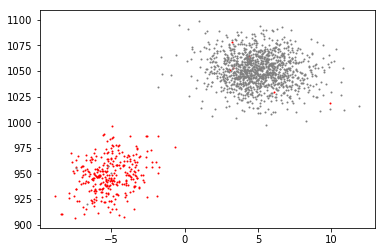

In [78]:
plt.scatter(df[df['Hogwarts House'] == target]['History of Magic'], df[df['Hogwarts House'] == target]['Transfiguration'], color='red', s=1)
plt.scatter(df[df['Hogwarts House'] != target]['History of Magic'], df[df['Hogwarts House'] != target]['Transfiguration'], color='gray', s=1)
plt.show()

In [79]:
def normalization(target, val_min, val_max):
    return (target - val_min) / (val_max - val_min)

y =  np.array(list(map(lambda x: 0 if x == target else 1,
                        df.values[:, 0])))
x = df.values[:, 1:].astype(np.float32)
x_minmax0 = np.array([x[:, 0].min(), x[:, 0].max()])
x_minmax1 = np.array([x[:, 1].min(), x[:, 1].max()])
x[:, 0] = normalization(x[:, 0], *x_minmax0)
x[:, 1] = normalization(x[:, 1], *x_minmax1)
bias = np.ones((df.shape[0], 1))
x = np.concatenate((x, bias), 1)

In [80]:
def sigmoid(predict):
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

def loss_log(y, predict):
    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [81]:
weight = np.random.random(x.shape[1])
delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.0001] * weight.size, np.float32)
epochs = 200
error = np.zeros(epochs, np.float32)
for j in range(epochs):
    predict = sigmoid(x @ weight)
    error[j] = loss_log(y, predict)
    for i in range(x.shape[0]):
        predict = sigmoid(x[i] @ weight)
        # delta += (predict - y[i]) * x[i]
        delta += (predict - y[i]) * predict * (1 - predict) * x[i]
    weight -= delta * alpha

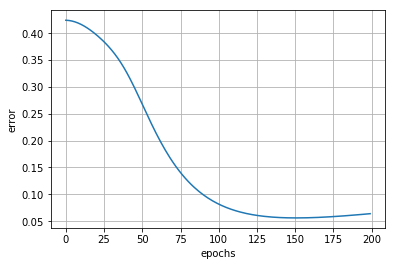

In [82]:
plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

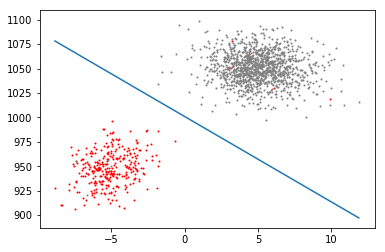

In [83]:
plt.scatter(df[df['Hogwarts House'] == target]['History of Magic'], df[df['Hogwarts House'] == target]['Transfiguration'], color='red', s=1)
plt.scatter(df[df['Hogwarts House'] != target]['History of Magic'], df[df['Hogwarts House'] != target]['Transfiguration'], color='gray', s=1)

divider_x0 = x_minmax0
divider_x1 = -(normalization(x_minmax0, *x_minmax0) * weight[0] + weight[2]) / weight[1]
divider_x1 = divider_x1 * (x_minmax1[1] - x_minmax1[0]) + x_minmax1[0]
plt.plot(divider_x0, divider_x1)
plt.show()